# Car Prices Prediction (Example of One Hot Encoding)

### Problem Statement 
This file has car sell prices for 3 different models. First plot data points on a scatter plot chart to see if linear regression model can be applied. If yes, then build a model that can answer following questions,

1) Predict price of a mercedez benz that is 4 yr old with mileage 45000

2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


### As per the graph, we can apply linear model on it

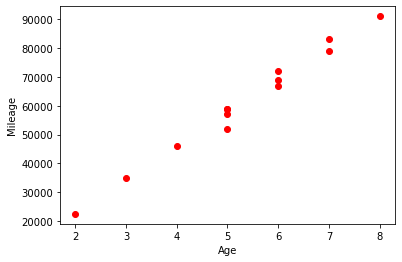

In [3]:
%matplotlib inline
plt.xlabel('Age')
plt.ylabel('Mileage')
plt.scatter(df['Age(yrs)'],df.Mileage,color='red')

## Dummie Variable approach

### We are doing dummies encoding here on our Car Model column

In [4]:
dummies = pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


### Concatinating both dummies dataframe and our main dataframe

In [5]:
df_dummies = pd.concat([df,dummies],axis='columns')
df_dummies

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


## Droping Car Model and Mercedez Benz C class. We can drop any Car Model but we need to drop one inorder to save from dummy variable trap

In [6]:
df_dummies.drop(['Car Model','Mercedez Benz C class'],axis='columns',inplace=True)
df_dummies

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [9]:
rest_data = df_dummies.drop('Sell Price($)',axis='columns')
rest_data

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [12]:
price_data = df_dummies['Sell Price($)']
price_data

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [15]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(rest_data,price_data)

LinearRegression()

### Question 1: Predict price of a mercedez benz that is 4 yr old with mileage 45000

In [16]:
model.predict([[45000,4,0,0]])

array([36991.31721061])

### Question 2: Predict price of a BMW X5 that is 7 yr old with mileage 86000

In [17]:
model.predict([[86000,7,0,1]])

array([11080.74313219])

### Question 3: Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())

In [19]:
model.score(rest_data,price_data)

0.9417050937281083